In [448]:
#First toy implementation of clustering for cliente segmentation project
"""Source: https://www.youtube.com/watch?v=YHz2RokKI3M&t=3642s&ab_channel=EscuelaFULLSTACK
Repo cloned
"""

'Source: https://www.youtube.com/watch?v=YHz2RokKI3M&t=3642s&ab_channel=EscuelaFULLSTACK\nRepo cloned\n'

In [449]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

import os

import io


In [450]:
#Parte I: dataset loading, correlation analysis and general visualization


In [451]:
df = pd.read_csv("AgenciasMicrof_Indic.csv")
df.columns

Index(['AGENCIAS', 'Mora.Media', 'CAR.Media', 'Mora.8.30.Media',
       'Judicial.Media', 'Cartera.Pesada.Promedio',
       'Tasa.de.rentabilidad.Bruta', 'Ingreso.Promedio',
       'Margen.Financiero.Mes.M', 'Intereses.de.Credito.Jun.17',
       'Utilidad.Mes.M', 'Clientes', 'Cuentas', 'Desembolsos', 'Saldo',
       'Meses.en.Funcion'],
      dtype='object')

In [452]:
df.shape

(120, 16)

In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AGENCIAS                     120 non-null    object 
 1   Mora.Media                   120 non-null    float64
 2   CAR.Media                    120 non-null    float64
 3   Mora.8.30.Media              120 non-null    float64
 4   Judicial.Media               120 non-null    float64
 5   Cartera.Pesada.Promedio      120 non-null    float64
 6   Tasa.de.rentabilidad.Bruta   120 non-null    float64
 7   Ingreso.Promedio             120 non-null    float64
 8   Margen.Financiero.Mes.M      120 non-null    float64
 9   Intereses.de.Credito.Jun.17  120 non-null    float64
 10  Utilidad.Mes.M               120 non-null    float64
 11  Clientes                     120 non-null    int64  
 12  Cuentas                      120 non-null    int64  
 13  Desembolsos         

In [454]:
df.head()

,AGENCIAS,Mora.Media,CAR.Media,Mora.8.30.Media,Judicial.Media,Cartera.Pesada.Promedio,Tasa.de.rentabilidad.Bruta,Ingreso.Promedio,Margen.Financiero.Mes.M,Intereses.de.Credito.Jun.17,Utilidad.Mes.M,Clientes,Cuentas,Desembolsos,Saldo,Meses.en.Funcion
0,Agencia_1,0.061715,0.073098,0.029231,0.041328,0.081526,1.661979,374027.081188,1.090964e+06,2240211.79,121183.2091,1819,1975,1912700.0,20261397.06,7.326489
1,Agencia_2,0.078396,0.079581,0.023850,0.059438,0.106191,2.001288,279416.337518,9.386190e+05,1775647.47,31513.4712,1267,1463,1473600.0,15684038.20,19.219713
2,Agencia_3,0.071103,0.076640,0.027991,0.055402,0.076054,1.777991,408598.215412,1.466472e+06,2700761.90,210296.2826,3036,3250,2272720.0,27120439.62,26.513347
3,Agencia_4,0.061930,0.068141,0.048097,0.036915,0.112533,1.966054,719976.185012,2.436409e+06,4511839.64,427145.0846,5616,6039,2128870.0,37785084.18,79.572895
4,Agencia_5,0.060584,0.069302,0.036670,0.046486,0.091240,1.799623,450459.667241,1.650755e+06,2802044.98,309514.5234,3431,3854,2362080.0,26960603.16,70.176591


In [455]:
cols = ['Mora.Media', 'CAR.Media', 'Mora.8.30.Media',
       'Judicial.Media', 'Cartera.Pesada.Promedio',
       'Tasa.de.rentabilidad.Bruta', 'Ingreso.Promedio',
       'Margen.Financiero.Mes.M', 'Intereses.de.Credito.Jun.17',
       'Utilidad.Mes.M', 'Clientes', 'Cuentas', 'Desembolsos', 'Saldo',
       'Meses.en.Funcion']

<AxesSubplot:>

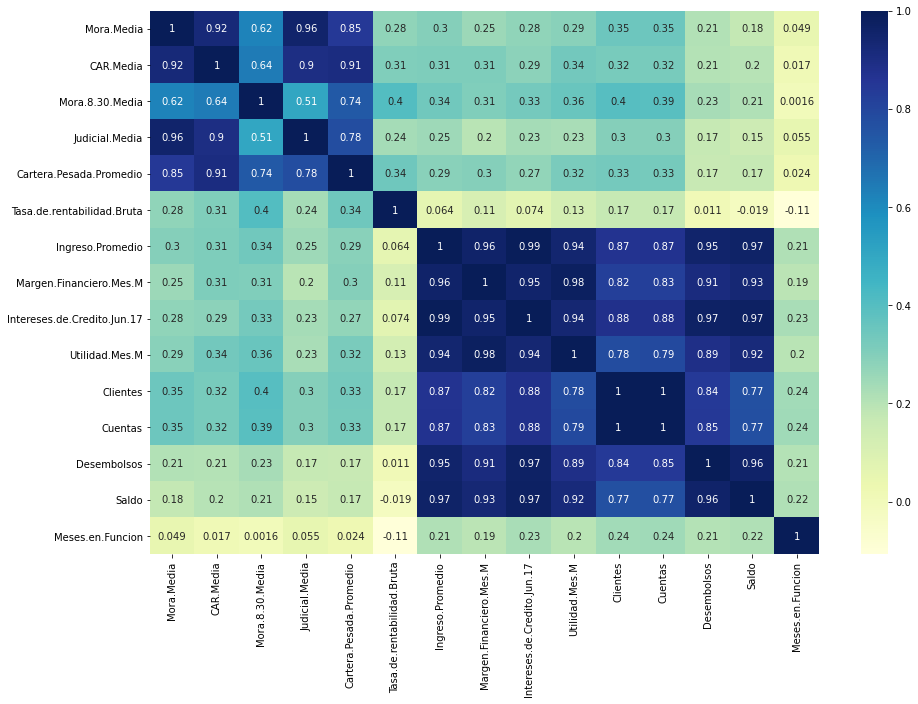

In [456]:
#Correlation
corr_matrix = df[cols].corr()
plt.rcParams["figure.figsize"] = (15,10)
sns.heatmap(data = corr_matrix, cmap= "YlGnBu", cbar = True, annot = True)

In [457]:
#Drop some variables according to business knowledge
df_copy = df.copy()
df.drop(['Mora.8.30.Media', 'Judicial.Media','Tasa.de.rentabilidad.Bruta', 'Margen.Financiero.Mes.M', 'Cuentas'], axis = 1, inplace = True)


In [458]:
df.columns

Index(['AGENCIAS', 'Mora.Media', 'CAR.Media', 'Cartera.Pesada.Promedio',
       'Ingreso.Promedio', 'Intereses.de.Credito.Jun.17', 'Utilidad.Mes.M',
       'Clientes', 'Desembolsos', 'Saldo', 'Meses.en.Funcion'],
      dtype='object')

In [459]:
df.describe()

,Mora.Media,CAR.Media,Cartera.Pesada.Promedio,Ingreso.Promedio,Intereses.de.Credito.Jun.17,Utilidad.Mes.M,Clientes,Desembolsos,Saldo,Meses.en.Funcion
count,120.000000,120.000000,120.000000,1.200000e+02,1.200000e+02,1.200000e+02,120.000000,1.200000e+02,1.200000e+02,120.000000
mean,0.029765,0.037223,0.049810,3.550133e+05,2.344790e+06,2.352075e+05,2397.733333,2.096883e+06,2.294547e+07,63.462252
std,0.022180,0.028198,0.031698,3.504344e+05,2.076532e+06,4.983196e+05,1557.969718,1.668600e+06,2.751867e+07,59.853644
min,0.000000,0.000000,0.000000,2.432313e+01,5.552860e+03,-5.670631e+05,65.000000,2.845000e+05,3.308477e+05,0.000000
25%,0.015678,0.019526,0.026762,1.248528e+05,1.118742e+06,1.713003e+03,1270.750000,1.129225e+06,1.061584e+07,18.004107
50%,0.026433,0.032342,0.046383,3.101456e+05,2.072815e+06,1.678352e+05,2107.000000,1.776958e+06,1.915635e+07,44.386037
75%,0.041609,0.049515,0.067052,5.025481e+05,3.221794e+06,4.007123e+05,3355.250000,2.575072e+06,2.993977e+07,91.227926
max,0.108884,0.143101,0.173933,3.186862e+06,1.932989e+07,4.119757e+06,9411.000000,1.584958e+07,2.864503e+08,346.710472


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(1, 0, 'Mora.Media'),
  Text(2, 0, 'CAR.Media'),
  Text(3, 0, 'Cartera.Pesada.Promedio'),
  Text(4, 0, 'Ingreso.Promedio'),
  Text(5, 0, 'Intereses.de.Credito.Jun.17'),
  Text(6, 0, 'Utilidad.Mes.M'),
  Text(7, 0, 'Clientes'),
  Text(8, 0, 'Desembolsos'),
  Text(9, 0, 'Saldo'),
  Text(10, 0, 'Meses.en.Funcion')])

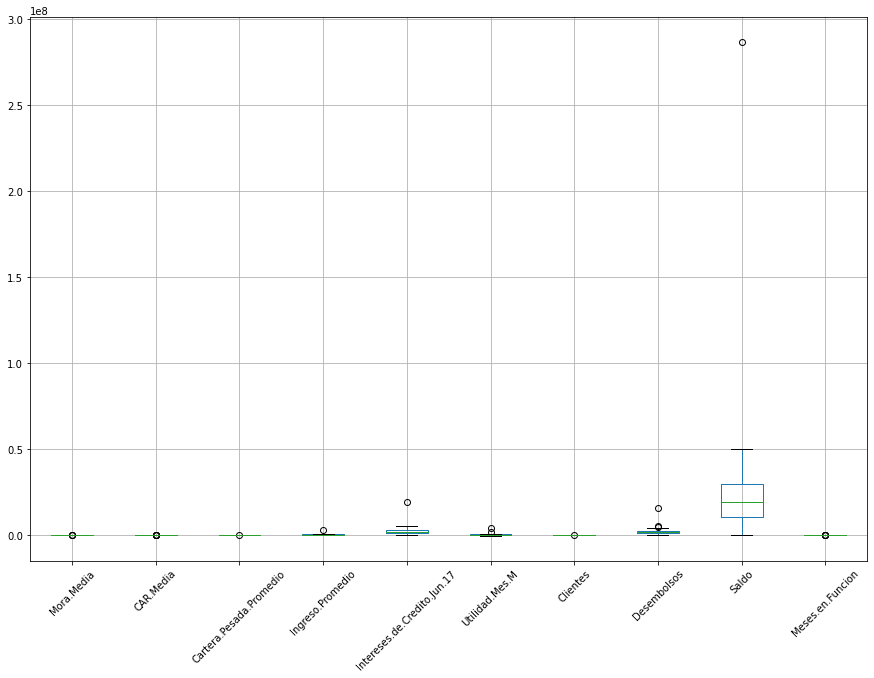

In [460]:
#Boxplot visualization
plt.rcParams["figure.figsize"] = (15,10)
df.boxplot(return_type = "axes")
plt.xticks(rotation = 45)


In [461]:
#Se decide eliminar por negocio la variable saldo
df_copy_2 = df.copy()
df.drop("Saldo", axis = 1, inplace = True)

In [462]:
df.columns

Index(['AGENCIAS', 'Mora.Media', 'CAR.Media', 'Cartera.Pesada.Promedio',
       'Ingreso.Promedio', 'Intereses.de.Credito.Jun.17', 'Utilidad.Mes.M',
       'Clientes', 'Desembolsos', 'Meses.en.Funcion'],
      dtype='object')

In [463]:
#PartII: re-scaling the data
agencias = df.AGENCIAS
X = df.drop("AGENCIAS", axis = 1)
sc = StandardScaler() #(x- mean)/std
X_array = sc.fit_transform(X.values)
X_sc = pd.DataFrame(X_array, columns = X.columns)

In [464]:
X_sc.head()

,Mora.Media,CAR.Media,Cartera.Pesada.Promedio,Ingreso.Promedio,Intereses.de.Credito.Jun.17,Utilidad.Mes.M,Clientes,Desembolsos,Meses.en.Funcion
0,1.446519,1.277585,1.004783,0.054485,-0.050573,-0.229777,-0.373024,-0.110845,-0.941816
1,2.201745,1.508466,1.786146,-0.216628,-0.275232,-0.410476,-0.728817,-0.375103,-0.742278
2,1.871532,1.403721,0.831406,0.153551,0.172145,-0.050200,0.411396,0.105822,-0.619909
3,1.456239,1.101076,1.987082,1.045825,1.047966,0.386785,2.074341,0.019250,0.270296
4,1.395312,1.142421,1.312514,0.273508,0.221124,0.149740,0.665994,0.159600,0.112650


(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, 'Mora.Media'),
  Text(2, 0, 'CAR.Media'),
  Text(3, 0, 'Cartera.Pesada.Promedio'),
  Text(4, 0, 'Ingreso.Promedio'),
  Text(5, 0, 'Intereses.de.Credito.Jun.17'),
  Text(6, 0, 'Utilidad.Mes.M'),
  Text(7, 0, 'Clientes'),
  Text(8, 0, 'Desembolsos'),
  Text(9, 0, 'Meses.en.Funcion')])

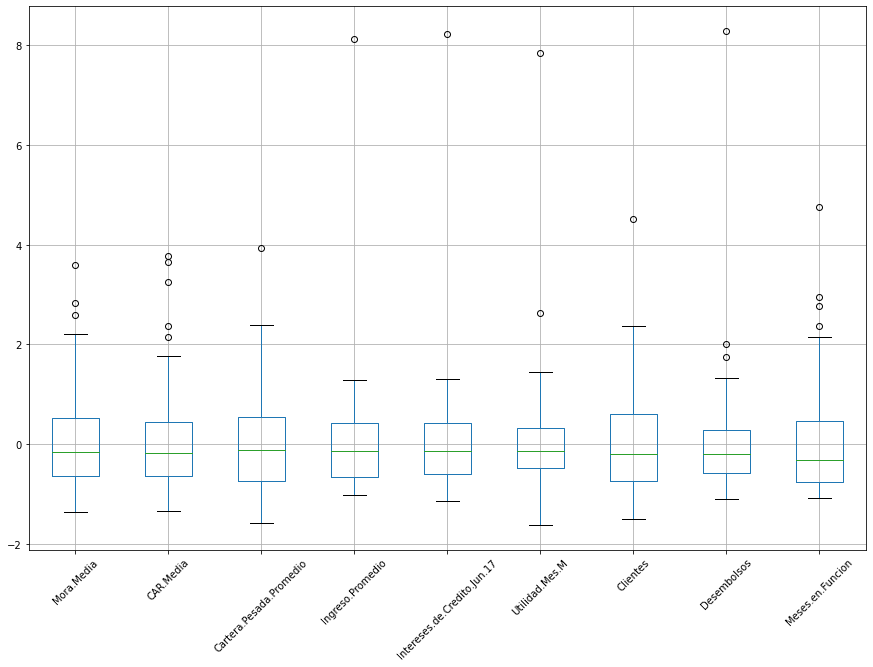

In [465]:
plt.rcParams["figure.figsize"] = (15,10)
X_sc.boxplot(return_type = "axes")
plt.xticks(rotation = 45)

In [466]:
#3. PCA with 2 components

pca = PCA(n_components = 2)
pca.fit(X_sc)

PCA(n_components=2)

In [467]:
np.sum(pca.explained_variance_ratio_)

0.8335469824399593

In [468]:
#Create a new dataset with the components
X_sc_PCA = pca.transform(X_sc) #cada datapoint ahora es aproximadamente explicado por la intersección de dos componentes ortogonales
X_sc_PCA[:10]

array([[ 0.51228498, -2.15985888],
       [ 0.43354574, -3.28539841],
       [ 1.23789086, -2.08135895],
       [ 2.96124532, -1.62272716],
       [ 1.52473337, -1.75787549],
       [ 0.9872968 , -1.59808862],
       [ 0.01810994, -3.74600381],
       [ 1.92773878, -2.11200431],
       [ 2.79375812, -4.05511219],
       [ 1.49844895, -1.57882789]])

Text(0, 0.5, 'PCA 2')

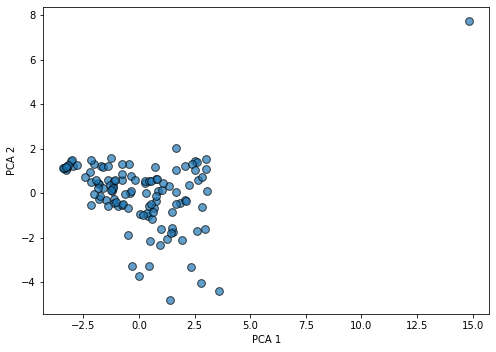

In [469]:
#Visualization of the dataset in terms of the two pca components
plt.figure(figsize = (8,8))

plt.scatter(X_sc_PCA[:,0], X_sc_PCA[:,1], s = 60, edgecolors = "black", alpha = 0.7)
plt.gca().set_aspect("equal")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

In [470]:
"""Two things that affect the clustering process:
- Correlated features
- Outliers (because I´m planning to create clusters)"""

'Two things that affect the clustering process:\n- Correlated features\n- Outliers (because I´m planning to create clusters)'

In [471]:
#We see a clear otulier here, so we decide to eliminate it
#identify the datapoint
df_pca = pd.DataFrame(X_sc_PCA, columns = ["PCA_1", "PCA_2"])
df_total = pd.concat((X_sc,df_pca), axis = 1)
df_total.head()

,Mora.Media,CAR.Media,Cartera.Pesada.Promedio,Ingreso.Promedio,Intereses.de.Credito.Jun.17,Utilidad.Mes.M,Clientes,Desembolsos,Meses.en.Funcion,PCA_1,PCA_2
0,1.446519,1.277585,1.004783,0.054485,-0.050573,-0.229777,-0.373024,-0.110845,-0.941816,0.512285,-2.159859
1,2.201745,1.508466,1.786146,-0.216628,-0.275232,-0.410476,-0.728817,-0.375103,-0.742278,0.433546,-3.285398
2,1.871532,1.403721,0.831406,0.153551,0.172145,-0.050200,0.411396,0.105822,-0.619909,1.237891,-2.081359
3,1.456239,1.101076,1.987082,1.045825,1.047966,0.386785,2.074341,0.019250,0.270296,2.961245,-1.622727
4,1.395312,1.142421,1.312514,0.273508,0.221124,0.149740,0.665994,0.159600,0.112650,1.524733,-1.757875


In [472]:
#df_total = pd.concat((agencias, df_total), axis = 1)
df_total.head()

,Mora.Media,CAR.Media,Cartera.Pesada.Promedio,Ingreso.Promedio,Intereses.de.Credito.Jun.17,Utilidad.Mes.M,Clientes,Desembolsos,Meses.en.Funcion,PCA_1,PCA_2
0,1.446519,1.277585,1.004783,0.054485,-0.050573,-0.229777,-0.373024,-0.110845,-0.941816,0.512285,-2.159859
1,2.201745,1.508466,1.786146,-0.216628,-0.275232,-0.410476,-0.728817,-0.375103,-0.742278,0.433546,-3.285398
2,1.871532,1.403721,0.831406,0.153551,0.172145,-0.050200,0.411396,0.105822,-0.619909,1.237891,-2.081359
3,1.456239,1.101076,1.987082,1.045825,1.047966,0.386785,2.074341,0.019250,0.270296,2.961245,-1.622727
4,1.395312,1.142421,1.312514,0.273508,0.221124,0.149740,0.665994,0.159600,0.112650,1.524733,-1.757875


In [473]:
df_total[df_total["PCA_1"] > 13]

,Mora.Media,CAR.Media,Cartera.Pesada.Promedio,Ingreso.Promedio,Intereses.de.Credito.Jun.17,Utilidad.Mes.M,Clientes,Desembolsos,Meses.en.Funcion,PCA_1,PCA_2
119,-0.49196,-0.179773,-0.624186,8.114847,8.213846,7.827981,4.520417,8.276614,1.710058,14.838375,7.739642


In [474]:
df_total.drop([119], inplace = True)
df_total.tail()

,Mora.Media,CAR.Media,Cartera.Pesada.Promedio,Ingreso.Promedio,Intereses.de.Credito.Jun.17,Utilidad.Mes.M,Clientes,Desembolsos,Meses.en.Funcion,PCA_1,PCA_2
114,-1.347615,-1.325574,-1.491886,-0.993221,-1.028051,-1.600294,-1.191605,-0.654274,-0.219730,-3.230109,1.214004
115,-1.347615,-1.325574,-1.577978,-1.017244,-1.131235,-0.745974,-1.503569,-1.090724,2.150475,-2.992876,1.485884
116,-1.343257,-1.316760,-1.408332,-0.891729,-0.829370,-1.050414,-0.839680,-0.565819,-1.009615,-2.775789,1.281297
117,-1.347615,-1.325574,-1.577978,-1.011916,-1.099345,-1.103128,-1.288933,-0.763155,-0.316192,-3.179361,1.267692
118,-1.347615,-1.325574,-1.548764,-0.986070,-1.017107,-1.267023,-1.218032,-0.913712,-0.843150,-3.282873,1.160764


In [475]:
#REPEAT THE PCA application
df_total.drop(["PCA_1", "PCA_2"], axis = 1, inplace = True)


In [476]:
pca = PCA(n_components = 2)
pca.fit(df_total)
np.sum(pca.explained_variance_ratio_)

0.7961294404176036

In [477]:
#Create a new dataset with the components
X_sc_PCA = pca.transform(df_total) #cada datapoint ahora es aproximadamente explicado por la intersección de dos componentes ortogonales
X_sc_PCA[:10]

array([[ 1.4260095 ,  1.80411493],
       [ 1.83502628,  2.78424505],
       [ 2.08517772,  1.28681113],
       [ 3.52753881, -0.15851218],
       [ 2.23257445,  0.73233835],
       [ 1.71503239,  0.62932175],
       [ 1.65381361,  3.37813098],
       [ 2.67822215,  1.24731276],
       [ 4.2316026 ,  2.82009228],
       [ 2.13559994,  0.56437736]])

Text(0, 0.5, 'PCA 2')

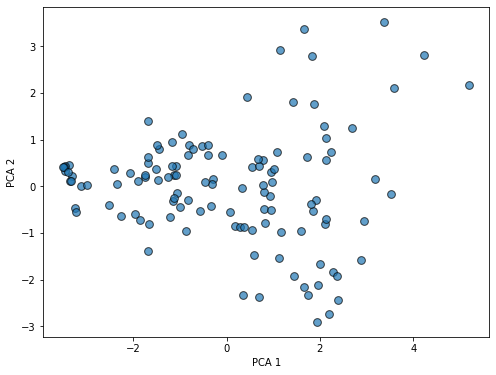

In [478]:
#Visualization of the dataset in terms of the two pca components
plt.figure(figsize = (8,8))

plt.scatter(X_sc_PCA[:,0], X_sc_PCA[:,1], s = 60, edgecolors = "black", alpha = 0.7)
plt.gca().set_aspect("equal")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

In [479]:
#Rejoin the pc columns to original data
df_pca = pd.DataFrame(X_sc_PCA, columns = ["PCA_1", "PCA_2"])
df_total = pd.concat((df_total,df_pca), axis = 1)
df_total.tail()

,Mora.Media,CAR.Media,Cartera.Pesada.Promedio,Ingreso.Promedio,Intereses.de.Credito.Jun.17,Utilidad.Mes.M,Clientes,Desembolsos,Meses.en.Funcion,PCA_1,PCA_2
114,-1.347615,-1.325574,-1.491886,-0.993221,-1.028051,-1.600294,-1.191605,-0.654274,-0.219730,-3.352116,0.119769
115,-1.347615,-1.325574,-1.577978,-1.017244,-1.131235,-0.745974,-1.503569,-1.090724,2.150475,-3.221142,-0.549308
116,-1.343257,-1.316760,-1.408332,-0.891729,-0.829370,-1.050414,-0.839680,-0.565819,-1.009615,-2.985324,0.018771
117,-1.347615,-1.325574,-1.577978,-1.011916,-1.099345,-1.103128,-1.288933,-0.763155,-0.316192,-3.342549,0.114969
118,-1.347615,-1.325574,-1.548764,-0.986070,-1.017107,-1.267023,-1.218032,-0.913712,-0.843150,-3.395834,0.316596


In [480]:
#Segmentacion K-Means
#Select the pca columns

df_total.iloc[:, 9:12].head()

,PCA_1,PCA_2
0,1.426009,1.804115
1,1.835026,2.784245
2,2.085178,1.286811
3,3.527539,-0.158512
4,2.232574,0.732338


In [481]:
#We start using 5 centroids as a test
kmeans = KMeans(n_clusters= 5, random_state= 2020)
kmeans.fit(df_total.iloc[:, 9:12])

KMeans(n_clusters=5, random_state=2020)

In [482]:
print(kmeans.labels_)

[4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 1 2 0 1 2 0 1 2 2 1 1 0 2 1 0 0
 2 1 1 2 1 2 2 2 1 2 2 0 0 0 2 2 0 1 0 2 0 0 2 0 1 1 2 0 2 2 1 2 2 0 1 1 1
 0 1 0 0 0 0 0 0 3 0 0 0 0 0 3 0 0 0 0 1 0 0 0 0 0 3 3 0 0 3 3 0 0 3 3 0 3
 3 3 3 3 3 3 3 3]


In [483]:
#Assign the  clusters to data
print(kmeans.predict(df_total.iloc[:, 9:12]))

[4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 1 2 0 1 2 0 1 2 2 1 1 0 2 1 0 0
 2 1 1 2 1 2 2 2 1 2 2 0 0 0 2 2 0 1 0 2 0 0 2 0 1 1 2 0 2 2 1 2 2 0 1 1 1
 0 1 0 0 0 0 0 0 3 0 0 0 0 0 3 0 0 0 0 1 0 0 0 0 0 3 3 0 0 3 3 0 0 3 3 0 3
 3 3 3 3 3 3 3 3]


In [484]:
kmeans.cluster_centers_

array([[-1.13224007,  0.18233239],
       [ 1.80989388, -1.81603259],
       [ 0.86590365, -0.08916757],
       [-3.10562073,  0.07161057],
       [ 2.64474478,  1.75812302]])

Text(0, 0.5, 'PCA 2')

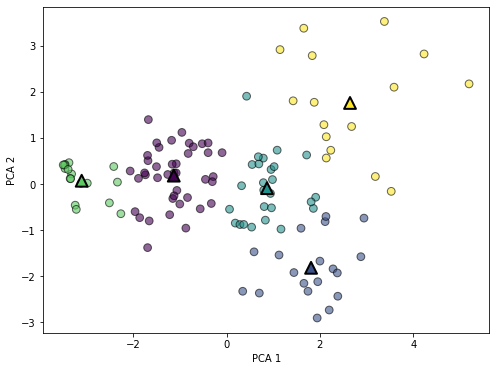

In [485]:
#Plotting...
# x defecto el tamaño del ancho y alto es de 6.4 y 4.8
plt.rcParams['figure.figsize'] = (8, 6)

# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.scatter(df_total["PCA_1"], df_total["PCA_2"], c=kmeans.labels_, cmap='viridis', s=60, edgecolors="black", alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker='^', s=140, linewidth=2, c=[0, 1, 2, 3, 4], cmap='viridis', edgecolors="black")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

In [486]:
#Find the optimal number of clusters
"""Inercia: suma de todas las diferencias entre cada miembro del cluster y su centroide. Un nro apropiado de agrupaciones 
debe producir una pequeña inercia

Silueta: "máxima cohesión interna y máxima separación de grupos". Valor cercano a 1 es bueno; valor cercano a
0 indica que hay superposicion de grupos. Valor cercano a -1 indica que la muestra se ha asignado a un grupo incorrecto"""

'Inercia: suma de todas las diferencias entre cada miembro del cluster y su centroide. Un nro apropiado de agrupaciones \ndebe producir una pequeña inercia\n\nSilueta: "máxima cohesión interna y máxima separación de grupos". Valor cercano a 1 es bueno; valor cercano a\n0 indica que hay superposicion de grupos. Valor cercano a -1 indica que la muestra se ha asignado a un grupo incorrecto'

Text(0, 0.5, 'Inertia')

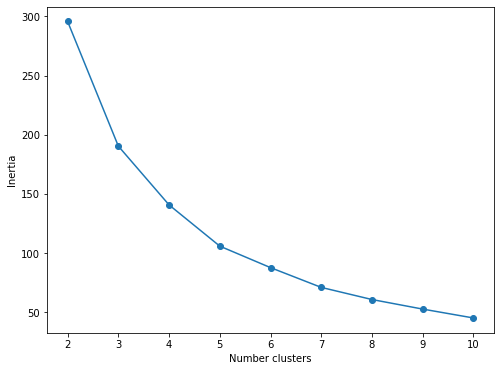

In [487]:
#Inertia
nb_clusters = [2,3,4,5,6,7,8,9, 10]
inertias = []
for n in nb_clusters:
    km = KMeans(n_clusters= n)
    km.fit(df_total.iloc[:, 9:12])
    inertias.append(km.inertia_)
    
plt.plot(nb_clusters, inertias, marker = "o")
plt.xlabel("Number clusters")
plt.ylabel("Inertia")

Text(0, 0.5, 'Silhouette Scores')

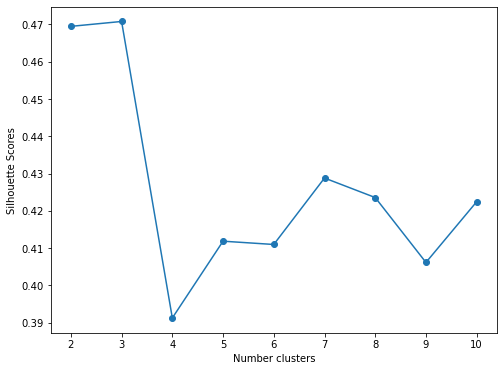

In [488]:
#Silhouette
from sklearn.metrics import silhouette_score
nb_clusters = [2,3,4,5,6,7,8,9, 10]
avg_silhouettes = []
for n in nb_clusters:
    km = KMeans(n_clusters= n)
    k_s = km.fit_predict(df_total.iloc[:, 9:12])
    avg_silhouettes.append(silhouette_score(df_total.iloc[:, 9:12], k_s))
    
plt.plot(nb_clusters, avg_silhouettes, marker = "o")
plt.xlabel("Number clusters")
plt.ylabel("Silhouette Scores")


In [489]:
#Analizando se ve que en conjunto el mejor modelo debiera tener 3 centroides(clusters)

kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_total.iloc[:, 9:12])
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [490]:
kmeans.cluster_centers_

array([[-1.71064475,  0.14987945],
       [ 1.27343618, -0.91526458],
       [ 2.46997997,  1.70352051]])

Text(0, 0.5, 'PCA 2')

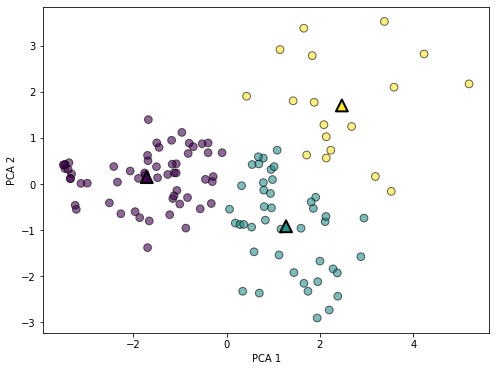

In [491]:
plt.rcParams['figure.figsize'] = (8, 6)

# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.scatter(df_total["PCA_1"], df_total["PCA_2"], c=kmeans.labels_, cmap='viridis', s=60, edgecolors="black", alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker='^', s=140, linewidth=2, c=[0, 1, 2], cmap='viridis', edgecolors="black")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

In [492]:
#Integration of cluster labels to data
df_total["Cluster"] = kmeans.labels_
df_total.head()

,Mora.Media,CAR.Media,Cartera.Pesada.Promedio,Ingreso.Promedio,Intereses.de.Credito.Jun.17,Utilidad.Mes.M,Clientes,Desembolsos,Meses.en.Funcion,PCA_1,PCA_2,Cluster
0,1.446519,1.277585,1.004783,0.054485,-0.050573,-0.229777,-0.373024,-0.110845,-0.941816,1.426009,1.804115,2
1,2.201745,1.508466,1.786146,-0.216628,-0.275232,-0.410476,-0.728817,-0.375103,-0.742278,1.835026,2.784245,2
2,1.871532,1.403721,0.831406,0.153551,0.172145,-0.050200,0.411396,0.105822,-0.619909,2.085178,1.286811,2
3,1.456239,1.101076,1.987082,1.045825,1.047966,0.386785,2.074341,0.019250,0.270296,3.527539,-0.158512,2
4,1.395312,1.142421,1.312514,0.273508,0.221124,0.149740,0.665994,0.159600,0.112650,2.232574,0.732338,2


In [493]:
df_total["Cluster"].value_counts()

0    58
1    43
2    18
Name: Cluster, dtype: int64

In [494]:
#Caracterizacion de clusters
df_total.drop(["PCA_1", "PCA_2"], axis = 1, inplace = True)
df_summary = df_total.groupby(by = "Cluster", as_index = False).mean()

<AxesSubplot:>

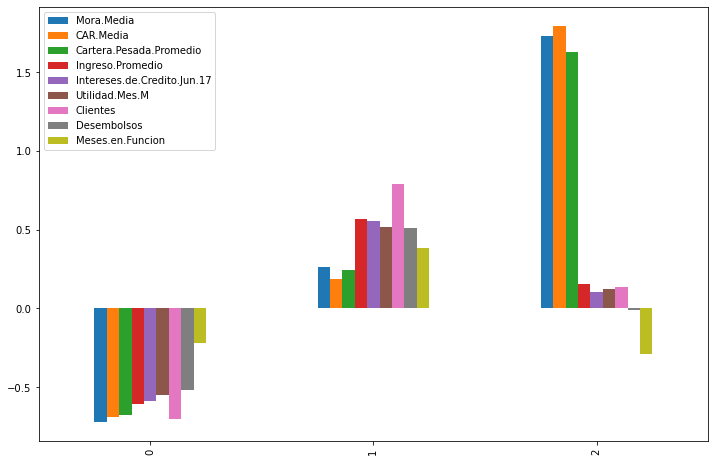

In [495]:
df_summary.drop("Cluster", axis = 1, inplace = True)
plt.rcParams["figure.figsize"] = (12,8)
df_summary.plot(kind = "bar")

array([[<AxesSubplot:title={'center':'CAR.Media'}, xlabel='[Cluster]'>,
        <AxesSubplot:title={'center':'Cartera.Pesada.Promedio'}, xlabel='[Cluster]'>,
        <AxesSubplot:title={'center':'Clientes'}, xlabel='[Cluster]'>],
       [<AxesSubplot:title={'center':'Desembolsos'}, xlabel='[Cluster]'>,
        <AxesSubplot:title={'center':'Ingreso.Promedio'}, xlabel='[Cluster]'>,
        <AxesSubplot:title={'center':'Intereses.de.Credito.Jun.17'}, xlabel='[Cluster]'>],
       [<AxesSubplot:title={'center':'Meses.en.Funcion'}, xlabel='[Cluster]'>,
        <AxesSubplot:title={'center':'Mora.Media'}, xlabel='[Cluster]'>,
        <AxesSubplot:title={'center':'Utilidad.Mes.M'}, xlabel='[Cluster]'>]],
      dtype=object)

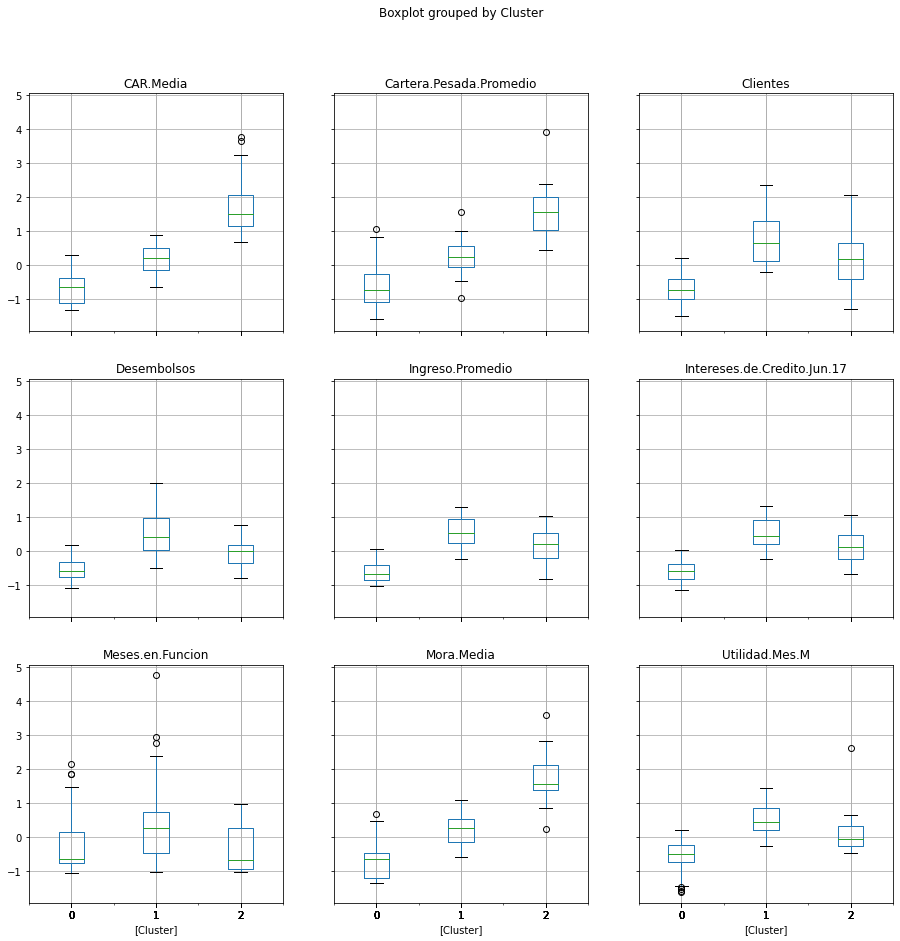

In [497]:
#Boxplot
plt.rcParams["figure.figsize"] = (15,15)

df_total.boxplot(by = "Cluster")
